In [39]:
import numpy as np
import matplotlib.pyplot as plt

class Particle(object):
    
    def __init__(self, particle_name, mass, position, velocity):
        self.name = particle_name
        self.m = mass
        self.rx = position[0]
        self.ry = position[1]
        self.rz = position[2]
        self.vx = velocity[0]
        self.vy = velocity[1]
        self.vz = velocity[2]
    def kinetic_energy(self):
        return 1/2*self.m*np.sqrt(self.vx**2+self.vy**2+self.vz**2)**2
    def distance(self,p2):
        return np.sqrt((p2.rx-self.rx)**2+(p2.ry-self.ry)**2+(p2.rz-self.rz)**2)
    def deltar(self,dt):
        self.rx = self.rx+dt*self.vx
        self.ry = self.ry+dt*self.vy
        self.rz = self.rz+dt*self.vz
        return self.rx,self.ry,self.rz
        
test_particle_stats = [1,1.605,[2,5,6],[10,10,10]]
test_particle = Particle(test_particle_stats[0],test_particle_stats[1],test_particle_stats[2],test_particle_stats[3])


test_particle2_stats = [2,5.2,[2,5,6],[7,-7,9]]
test_particle2 = Particle(test_particle2_stats[0],test_particle2_stats[1],
                          test_particle2_stats[2],test_particle2_stats[3])
print(test_particle.distance(test_particle2))

# dt attempt

print(test_particle.rx, test_particle.ry, test_particle.rz)

#-------------------------------------------------------------------------


class ChargedParticle(Particle):
    def __init__(self, particle_name, mass, position, velocity, charge, energy):
        super().__init__(particle_name, mass, position, velocity)
        self.q = charge
        self.e = energy
    def interaction(self,p2):
        if self.distance(p2) < 0.25:
            interaction = True
            print("interaction")
            if self.q + p2.q < self.q:
                print("merge")
                self.vx, self.vy, self.vz = np.zeros(3)
                p2.vx, p2.vy, p2.vz = np.zeros(3)
                self.q, p2.q = 0,0
            else:
                print("repel")
                self.vx, self.vy, self.vz = np.array([self.vx, self.vy, self.vz])*(-1)*(self.q+p2.q)*(self.m/p2.m)
                p2.vx, p2.vy, p2.vz = np.array([self.vx, self.vy, self.vz])*(-1)*(self.q+p2.q)*(p2.m/self.m)
        else:
            interaction = False
        
# test_charge = ChargedParticle(test_particle_stats[0],test_particle_stats[1],
#                               test_particle_stats[2],test_particle_stats[3],3)
# test_charge2 = ChargedParticle(test_particle2_stats[0],test_particle2_stats[1],
#                           test_particle2_stats[2],test_particle2_stats[3],6)
# print(test_charge.distance(test_charge2))
# # test_charge.interaction(test_charge2)
# print(test_charge.q,test_charge2.q)



0.0
2 5 6


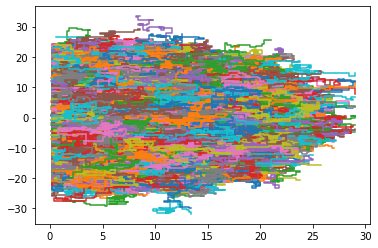

[8624, 6282, 4714, 3203, 2085, 1334, 795, 417, 215, 101, 39, 20, 13]


In [109]:

particle1 = ChargedParticle(1,1,[4,0,0],[4,0,0],0,1350)
particle2 = ChargedParticle(2,1,[4,0,0],[4,0,0],0,1350)

delta_t = 0.05
# for i in range(300):
#     particle1.deltar(delta_t)
#     print(particle1.rx,particle1.ry,particle1.rz)

def rand_walk(p1):
    change_dir = np.random.random()
    if change_dir < 0.66:
        p1.vx = p1.vx
        p1.vz = p1.vz
        p1.e = p1.e-1
        scatter = False
    else:
        if p1.vx != 0:
            if change_dir < 0.83:
                p1.vz = p1.vx
                p1.vx = 0
            else:
                p1.vz = -p1.vx
                p1.vx = 0
        elif p1.vz != 0:
            if change_dir < 0.83:
                p1.vx = p1.vz
                p1.vz = 0
            else:
                p1.vx = -p1.vz
                p1.vz = 0
        scatter_loss = np.random.random()
        if scatter_loss < 0.7:
            p1.e = p1.e - 2
        if scatter_loss >= 0.7 and scatter_loss < 0.95:
            p1.e = p1.e - 5
        if scatter_loss >= 0.95:
            p1.e = p1.e - 15
        scatter = True
        return scatter

    # print(change_dir)


scatter_avg = list()
mc_xlist = list()
mc_zlist = list()
ending_x = list()
ending_z = list()
histo_plotter = list()
escaped = list()
captured = list()
scat_back = list()

num_particles = 10000

shield_D = np.arange(5,30,2)

for v in shield_D:
    result_list = list()
    for i in range(num_particles):
        particle1 = ChargedParticle(1,1,[4,0,0],[4,0,0],0,1350)
        x_list = list()
        z_list = list()
        pure_xs = list()
        # vx_list = list()
        # vz_list = list()
        energy_list = list()
        scatter_list = list()
        scatter_x = [4]
        scatter_z = [0]
        counter = 0
        while particle1.rx >= 0 and particle1.rx <= v:
            mc_xlist.append(particle1.rx)
            mc_zlist.append(particle1.rz)
            x_list.append(particle1.rx)
            z_list.append(particle1.rz)
            if pure_xs.count(particle1.rx) < 1:
                pure_xs.append(particle1.rx)
            # vx_list.append(particle1.vx)
            # vz_list.append(particle1.vz)
            particle1.deltar(delta_t)
            if particle1.e <= 1/4*1350:
                if particle1.vx < 0:
                    particle1.vx = particle1.vx + 1
                    if particle1.vx >= -1:
                        result = 1
                        break
                if particle1.vx > 0:
                    particle1.vx = particle1.vx - 1
                    if particle1.vx <= 1:
                        result = 1
                        break
                if particle1.vz < 0:
                    particle1.vz = particle1.vz + 1
                    if particle1.vx >= -1:
                        result = 1
                        break
                if particle1.vz > 0:
                    particle1.vz = particle1.vz - 1
                    if particle1.vx <= 1:
                        result = 1
                        break
            scatter = rand_walk(particle1)
            if scatter:
                scatter_x.append(particle1.rx)
                scatter_z.append(particle1.rz)
                scatter_list.append(np.sqrt((scatter_x[-1]-scatter_x[-2])**2+(scatter_z[-1]-scatter_z[-2])**2))
            energy_list.append(particle1.e)
            counter += 1
            if particle1.rx < 0:
                result = 0
            if particle1.e <= 0:
                result = 1
                break
            if particle1.rx > v:
                result = 2
        result_list.append(result)
        ending_x.append(x_list[-1])
        ending_z.append(z_list[-1])
        plt.plot(x_list,z_list)
        if len(scatter_list) != 0:
            scatter_avg.append(sum(scatter_list)/len(scatter_list))
        histo_plotter.append(pure_xs)
        
    escaped.append(result_list.count(2))
    
    # print(scatter_list)

    
# plt.scatter(ending_x,ending_z)
# print(scatter_avg)
# plt.plot(x_list,z_list)
# plt.scatter(4,0,c="r")
plt.show()
# plt.scatter(x_list[-1],z_list[-1],c="y")

# for i in range(len(x_list)):
#     print(x_list[i],z_list[i],vx_list[i],vz_list[i])
print(escaped)

21974.53424597001 -0.18124386045928143


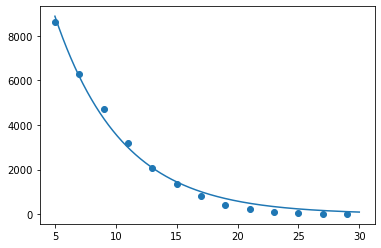

In [111]:


def exponential(x,a,b):
    return a*np.exp(b*x)

def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[0,0]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


a_fit, b_fit = mcFit2(exponential,shield_D,escaped)

x_plot = np.linspace(5,30,1000)
z_plot = a_fit*np.exp(b_fit*x_plot)

plt.scatter(shield_D,escaped)
plt.plot(x_plot, z_plot)

print(a_fit, b_fit)

In [88]:
d_mfp = sum(scatter_avg)/len(scatter_avg)


D = 15/d_mfp
print(15/d_mfp)

25.507854937572052


In [31]:
import scipy.optimize as opt

def exponential(x,a,b):
    return a*np.exp(b*x)

def exponential3(x,a,b,c):
    return a*np.exp(b*x+c)

def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[0,0]):
    slope = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))

def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0, maxfev = 10000)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))

In [536]:
clean_histo_plot = list()
for i in histo_plotter:
    for k in i:
        clean_histo_plot.append(k)
# print(clean_histo_plot)

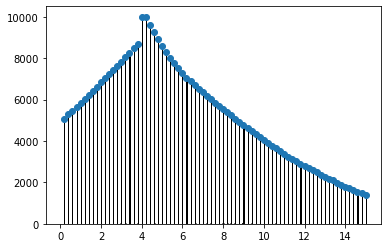

In [547]:
end_array = np.array(mc_xlist)
nobelowzero = end_array > 4
nobelowzero_x = end_array[nobelowzero]-4

aa2 = plt.hist(clean_histo_plot, bins=10000, color='skyblue', edgecolor='black')
no_zeros = aa2[0] > 100
test_z = aa2[0][no_zeros]
test_x = aa2[1][:-1][no_zeros]

shift_to4 = test_x >= 4
test_xx = test_x[shift_to4]-4
test_zz = test_z[shift_to4]

plt.scatter(test_x,test_z)
aaa, bbb = mcFit2(exponential,test_xx,test_zz,p0=[10000,-0.16])

In [548]:
# print(aa2[0] != 0)

In [550]:
print(aaa, bbb, bbb/D)

10238.771484169869 -0.16126370314833838 -0.006330431734800803


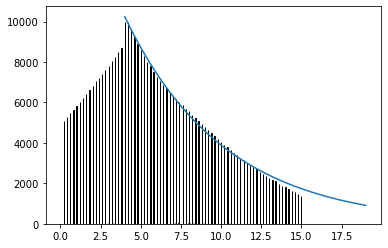

In [555]:
aa = plt.hist(clean_histo_plot, bins=1000, color='skyblue', edgecolor='black')


x_tester = np.linspace(0,15,1000)
plt.plot(x_tester+4,aaa*np.exp(x_tester*bbb))       

In [559]:
np.exp(11*bbb)

0.1696698592241072

---
---
---
# Helium

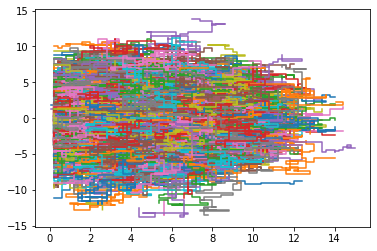

[4096, 2465, 1743, 1017, 786, 448, 323, 213, 116, 93, 49, 28, 26, 15, 10, 8, 0, 1, 4, 2, 1]


In [107]:

particle1 = ChargedParticle(1,4,[4,0,0],[4,0,0],2,1350)
particle2 = ChargedParticle(2,1,[4,0,0],[4,0,0],0,1350)

delta_t = 0.05
# for i in range(300):
#     particle1.deltar(delta_t)
#     print(particle1.rx,particle1.ry,particle1.rz)

def charged_rand_walk(p1):
    change_dir = np.random.random()
    scatter = False
    if change_dir < 0.6:
        p1.vx = p1.vx
        p1.vz = p1.vz
        p1.e = p1.e-1
    elif change_dir < 0.94:
        if p1.vx != 0:
            if change_dir < 0.77:
                p1.vz = p1.vx
                p1.vx = 0
            elif change_dir < 0.94:
                p1.vz = -p1.vx
                p1.vx = 0
        elif p1.vz != 0:
            if change_dir < 0.77:
                p1.vx = p1.vz
                p1.vz = 0
            elif change_dir < 0.94:
                p1.vx = -p1.vz
                p1.vz = 0
        scatter_loss = np.random.random()
        if scatter_loss < 0.7:
            p1.e = p1.e - 2
        if scatter_loss >= 0.7 and scatter_loss < 0.95:
            p1.e = p1.e - 5
        if scatter_loss >= 0.95:
            p1.e = p1.e - 15
        scatter = True
    else:
        charged_scatter = np.random.random()
        ch_energy = np.random.random()
        # Charged Interaction: Repel
        if charged_scatter < 0.6:
            p1.vx = -p1.vx
            p1.vz = -p1.vz
            if ch_energy < 0.6:
                p1.e = p1.e - 1
            elif ch_energy < 0.95:
                p1.e = p1.e - 6
            elif ch_energy < 1:
                p1.e = p1.e - 13
        elif charged_scatter < 0.8:
            if p1.vx != 0:
                p1.vz = p1.q*p1.vx
                p1.vx = 0
            elif p1.vz != 0:
                p1.vx = p1.q*p1.vx
                p1.vz = 0
            if ch_energy < 0.25:
                p1.e = p1.e
            elif ch_energy < 0.75:
                p1.e = p1.e + 1
            elif ch_energy < 1:
                p1.e = p1.e + 5
        else:
            if p1.vx != 0:
                p1.vz = -p1.q*p1.vx
                p1.vx = 0
            elif p1.vz != 0:
                p1.vx = -p1.q*p1.vx
                p1.vz = 0
            if ch_energy < 0.25:
                p1.e = p1.e
            elif ch_energy < 0.75:
                p1.e = p1.e + 1
            elif ch_energy < 1:
                p1.e = p1.e + 5

        # Charged Interaction: scatter
            
        scatter = True
    return scatter

    # print(change_dir)


scatter_avg = list()
mc_xlist = list()
mc_zlist = list()
ending_x = list()
ending_z = list()
histo_plotter = list()
escaped = list()

num_particles = 10000

shield_D = np.arange(5,15.1,0.5)

for v in shield_D:
    result_list = list()
    for i in range(num_particles):
        initial_energy = np.random.normal(850, 650)
        particle1 = ChargedParticle(1,1,[4,0,0],[4,0,0],0,initial_energy)
        x_list = list()
        z_list = list()
        pure_xs = list()
        # vx_list = list()
        # vz_list = list()
        energy_list = list()
        scatter_list = list()
        scatter_x = [4]
        scatter_z = [0]
        counter = 0
        while particle1.rx >= 0 and particle1.rx <= v:
            mc_xlist.append(particle1.rx)
            mc_zlist.append(particle1.rz)
            x_list.append(particle1.rx)
            z_list.append(particle1.rz)
            if pure_xs.count(particle1.rx) < 1:
                pure_xs.append(particle1.rx)
            # vx_list.append(particle1.vx)
            # vz_list.append(particle1.vz)
            particle1.deltar(delta_t)
            if particle1.e <= 1/4*1350:
                if particle1.vx < 0:
                    particle1.vx = particle1.vx + 1
                    if particle1.vx >= -1:
                        result = 1
                        break
                if particle1.vx > 0:
                    particle1.vx = particle1.vx - 1
                    if particle1.vx <= 1:
                        result = 1
                        break
                if particle1.vz < 0:
                    particle1.vz = particle1.vz + 1
                    if particle1.vx >= -1:
                        result = 1
                        break
                if particle1.vz > 0:
                    particle1.vz = particle1.vz - 1
                    if particle1.vx <= 1:
                        result = 1
                        break
            scatter = charged_rand_walk(particle1)
            if scatter:
                scatter_x.append(particle1.rx)
                scatter_z.append(particle1.rz)
                scatter_list.append(np.sqrt((scatter_x[-1]-scatter_x[-2])**2+(scatter_z[-1]-scatter_z[-2])**2))
            energy_list.append(particle1.e)
            counter += 1
            if particle1.rx < 0:
                result = 0
            if particle1.e <= 0:
                result = 1
                break
            if particle1.rx > v:
                result = 2

        result_list.append(result)
        ending_x.append(x_list[-1])
        ending_z.append(z_list[-1])
        plt.plot(x_list,z_list)
        if len(scatter_list) > 0:
            scatter_avg.append(sum(scatter_list)/len(scatter_list))
        histo_plotter.append(pure_xs)
    escaped.append(result_list.count(2))
    
    # print(scatter_list)

    
# plt.scatter(ending_x,ending_z)
# print(scatter_avg)
# plt.plot(x_list,z_list)
# plt.scatter(4,0,c="r")
plt.show()
# plt.scatter(x_list[-1],z_list[-1],c="y")

# for i in range(len(x_list)):
#     print(x_list[i],z_list[i],vx_list[i],vz_list[i])
print(escaped)

321947.2209199701 -0.8748528906175808


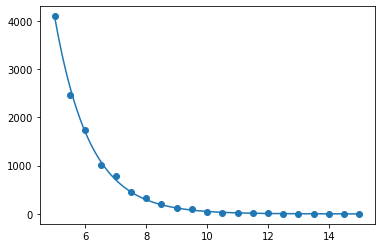

In [108]:
def exponential(x,a,b):
    return a*np.exp(b*x)

def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[0,0]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


a_fit, b_fit = mcFit2(exponential,shield_D,escaped)

x_plot = np.linspace(5,15,1000)
z_plot = a_fit*np.exp(b_fit*x_plot)

plt.scatter(shield_D,escaped)
plt.plot(x_plot, z_plot)

print(a_fit, b_fit)

In [30]:
result_list.count(2)/len(result_list)

0.0002

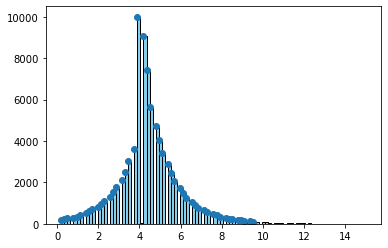

In [36]:
clean_histo_plot = list()
for i in histo_plotter:
    for k in i:
        clean_histo_plot.append(k)
# print(clean_histo_plot)

end_array = np.array(mc_xlist)
nobelowzero = end_array > 4
nobelowzero_x = end_array[nobelowzero]-4

aa2 = plt.hist(clean_histo_plot, bins=100, color='skyblue', edgecolor='black')
no_zeros = aa2[0] > 100
test_z = aa2[0][no_zeros]
test_x = aa2[1][:-1][no_zeros]

shift_to4 = test_x >= 4
test_xx = test_x[shift_to4]-4
test_zz = test_z[shift_to4]

plt.scatter(test_x,test_z)
aaa, bbb = mcFit2(exponential,test_xx,test_zz,p0=[10000,-0.16])

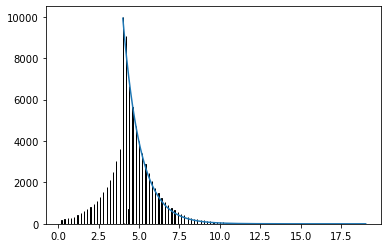

In [37]:
aa = plt.hist(clean_histo_plot, bins=1000, color='skyblue', edgecolor='black')


x_tester = np.linspace(0,15,1000)
plt.plot(x_tester+4,aaa*np.exp(x_tester*bbb))    

In [38]:
np.exp(11*bbb)

3.952448135283084e-05